In [142]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.feature_selection import RFE

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

import os
#Setting option to diaply maximum rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [143]:
df_house = pd.read_csv("train.csv")
df_house.head()
train=df_house.copy()
train.shape

(1460, 81)

In [144]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [145]:
target=train.pop('SalePrice')

In [146]:
df_test=pd.read_csv('test.csv')
test=df_test.copy()
test.shape

(1459, 80)

In [147]:
dataset = pd.concat(objs=[train, test], axis=0)
dataset.shape

#dataset = pd.get_dummies(dataset)


(2919, 80)

In [118]:
df_house_price=dataset.copy()

In [119]:
for col in df_house_price.columns.values:
        missing_values = df_house_price[col].isnull().sum()

        # drop column if there is more than 70 percent missing values
        if missing_values > len(df_house_price[col])* 70/100:
            print("droping column: {}".format(col))
            df_house_price.drop(col, axis = 1,inplace = True)

droping column: Alley
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [148]:

df_house_price['SaleType'] = df_house_price['SaleType'].replace(['COD','ConLD','CWD','ConLI','ConLw','Oth','Con'],'Others')
df_house_price['SaleCondition'] = df_house_price['SaleCondition'].replace(['Partial','Abnorml','Family','Alloca','AdjLand'],'Others')


# Replacing values with presence of less than 1 percent by same value/name.
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].replace([50,120,30,160,70,80,90,190,85,75,45,180,40,150],'Others')
df_house_price['MSZoning'] = df_house_price['MSZoning'].replace(['FV','C (all)','RH'], 'Others')
df_house_price['LotShape'] = df_house_price['LotShape'].replace(['IR2','IR3'], 'IR_Others')
df_house_price['LandContour'] = df_house_price['LandContour'].replace(['HLS','Bnk','Low'], 'Others')
df_house_price['LotConfig'] = df_house_price['LotConfig'].replace(['CulDSac','FR2','FR3'], 'Others')

df_house_price['Neighborhood'] = df_house_price['Neighborhood'].replace(['NAmes','CollgCr','OldTown','Edwards','Somerst'], 'Area_1')
df_house_price['Neighborhood'] = df_house_price['Neighborhood'].replace(['NridgHt','Gilbert','Sawyer','NWAmes','SawyerW'], 'Area_2')
df_house_price['Neighborhood'] = df_house_price['Neighborhood'].replace(['Mitchel','BrkSide','Crawfor','IDOTRR','Timber'], 'Area_3')
df_house_price['Neighborhood'] = df_house_price['Neighborhood'].replace(['NoRidge','StoneBr','SWISU','ClearCr','MeadowV','BrDale','Blmngtn','Veenker','NPkVill','Blueste' ], 'Area_4')

df_house_price['Condition1'] = df_house_price['Condition1'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe' ], 'Others')
df_house_price['Condition2'] = df_house_price['Condition2'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe' ], 'Others')

df_house_price['BldgType'] = df_house_price['BldgType'].replace(['TwnhsE','Duplex','Twnhs','2fmCon'], 'Others')
df_house_price['HouseStyle'] = df_house_price['HouseStyle'].replace(['1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin' ], 'Others')


df_house_price['OverallQual'] = df_house_price['LotConfig'].replace([1,2,3], 'Qual_1')
df_house_price['OverallQual'] = df_house_price['LotConfig'].replace([4,5,6,7], 'Qual_2')
df_house_price['OverallQual'] = df_house_price['LotConfig'].replace([8,9,10], 'Qual_3')


df_house_price['OverallCond'] = df_house_price['OverallCond'].replace([1,2,3,4,5], 'Qual_1')
df_house_price['OverallCond'] = df_house_price['OverallCond'].replace([4,5,6], 'Qual_2')
df_house_price['OverallCond'] = df_house_price['OverallCond'].replace([7,8,9], 'Qual_3')

df_house_price['RoofStyle'] = df_house_price['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'], 'Others')
df_house_price['RoofStyle'] = df_house_price['RoofStyle'].replace(['Hip','Flat','Gambrel','Mansard','Shed'], 'Others')
df_house_price['Exterior1st'] = df_house_price['Exterior1st'].replace(['Plywood','CemntBd','BrkFace','Stone','AsbShng','BrkComm','ImStucc','CBlock','AsphShn','WdShing','Stucco','ImStucc'], 'Others')
df_house_price['Exterior2nd'] = df_house_price['Exterior2nd'].replace(['Plywood','CmentBd','Brk Cmn','Other','Wd Shng','CemntBd','CemntBd','BrkFace','Stone','AsbShng','BrkComm','ImStucc','CBlock','AsphShn','WdShing','Stucco','ImStucc','other'], 'Others')
df_house_price['MasVnrType'] = df_house_price['MasVnrType'].replace(['Stone','BrkCmn'], 'Others')
df_house_price['MasVnrType'] = df_house_price['MasVnrType'].replace('None','No_type')
df_house_price['ExterQual'] = df_house_price['ExterQual'].replace(['Gd','Ex','Fa'], 'Not_TA')
df_house_price['ExterCond'] = df_house_price['ExterCond'].replace(['Gd','Ex','Fa','Po'], 'Not_TA')
df_house_price['Foundation'] = df_house_price['Foundation'].replace(['BrkTil','Slab','Stone','Wood'], 'Others')
df_house_price['BsmtQual'] = df_house_price['BsmtQual'].replace(['Gd','Ex','Fa'], 'Not_TA')
df_house_price['BsmtCond'] = df_house_price['BsmtCond'].replace(['Gd','Ex','Fa','Po'], 'Not_TA')
df_house_price['BsmtExposure'] = df_house_price['BsmtExposure'].replace(['Gd','Mn','Av'], 'Exposure')
df_house_price['BsmtExposure'] = df_house_price['BsmtExposure'].replace('No', 'No_Exposure')
df_house_price['BsmtFinType1'] = df_house_price['BsmtFinType1'].replace(['Rec','BLQ','LwQ'], 'Others')
df_house_price['HeatingQC'] = df_house_price['HeatingQC'].replace(['Gd','Fa','Po'], 'Not_TA_Ex')
df_house_price['Electrical'] = df_house_price['Electrical'].replace(['FuseA','FuseF','FuseP','Mix'], 'Fuse_AFP_Mix')

df_house_price['BsmtFullBath'] = df_house_price['BsmtFullBath'].replace([0.0,0],'No')
df_house_price['BsmtFullBath'] = df_house_price['BsmtFullBath'].replace([1.0,2.0,3.0,1,2,3],'Exist_123')
df_house_price['BsmtHalfBath'] = df_house_price['BsmtHalfBath'].replace([0.0,0],'No')
df_house_price['BsmtHalfBath'] = df_house_price['BsmtHalfBath'].replace([1.0,2.0,1,2],'Exist_12')
df_house_price['FullBath'] = df_house_price['FullBath'].replace([0,3,4,1],'Bath_0134')
df_house_price['FullBath'] = df_house_price['FullBath'].replace(2,'Bath_2')
df_house_price['HalfBath'] = df_house_price['HalfBath'].replace(0,'Bath_0')
df_house_price['HalfBath'] = df_house_price['HalfBath'].replace([1,2],'Bath_12')
df_house_price['BedroomAbvGr'] = df_house_price['BedroomAbvGr'].replace([0,1,5,6,8],'15680')
df_house_price['KitchenAbvGr'] = df_house_price['KitchenAbvGr'].replace([0,2,3],'230')
df_house_price['KitchenQual'] = df_house_price['HeatingQC'].replace(['Gd','Fa','Ex'], 'Not_TA')

df_house_price['BsmtFullBath'] = df_house_price['BsmtFullBath'].replace([0.0,0],'No')
df_house_price['BsmtFullBath'] = df_house_price['BsmtFullBath'].replace([1.0,2.0,3.0,1,2,3],'Exist_123')
df_house_price['BsmtHalfBath'] = df_house_price['BsmtHalfBath'].replace([0.0,0],'No')
df_house_price['BsmtHalfBath'] = df_house_price['BsmtHalfBath'].replace([1.0,2.0,1,2],'Exist_12')
df_house_price['FullBath'] = df_house_price['FullBath'].replace([0,3,4,1],'Bath_0134')
df_house_price['FullBath'] = df_house_price['FullBath'].replace(2,'Bath_2')
df_house_price['HalfBath'] = df_house_price['HalfBath'].replace(0,'Bath_0')
df_house_price['HalfBath'] = df_house_price['HalfBath'].replace([1,2],'Bath_12')
df_house_price['BedroomAbvGr'] = df_house_price['BedroomAbvGr'].replace([0,1,5,6,8],'15680')
df_house_price['KitchenAbvGr'] = df_house_price['KitchenAbvGr'].replace([0,2,3],'230')
df_house_price['KitchenQual'] = df_house_price['HeatingQC'].replace(['Gd','Fa','Ex'], 'Not_TA')

df_house_price['TotRmsAbvGrd'] = df_house_price['TotRmsAbvGrd'].replace([1,2,3,4],'RMS_1234')
df_house_price['TotRmsAbvGrd'] = df_house_price['TotRmsAbvGrd'].replace([5,6,7],'RMS_567')
df_house_price['TotRmsAbvGrd'] = df_house_price['TotRmsAbvGrd'].replace([8,9,10,11,12,13,14,15],'RMS_morethan7')
df_house_price['Functional'] = df_house_price['BsmtFinType1'].replace(['Min2','Min1','Mod','Maj1','Maj2','sev'],'No_Typ')
df_house_price['Fireplaces'] = df_house_price['Fireplaces'].replace([2,3,4], '2To4')
df_house_price['FireplaceQu'] = df_house_price['FireplaceQu'].replace(['Gd','Fa','Ex','Po'], 'Not_TA')
df_house_price['GarageType'] = df_house_price['GarageType'].replace(['BuiltIn','Basment','2Types','CarPort'],'Others')
df_house_price['GarageCars'] = df_house_price['GarageCars'].replace([3.0,4.0,5.0,0.0],'GC_0345')
df_house_price['GarageQual'] = df_house_price['GarageQual'].replace(['Gd','Fa','Po','Ex'], 'Not_TA')
df_house_price['GarageCond'] = df_house_price['GarageCond'].replace(['Gd','Fa','Po','Ex'], 'Not_TA')
df_house_price['PavedDrive'] = df_house_price['PavedDrive'].replace(['N','P'], 'N_P')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([1,2,3,4,5],'JFMAM')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([1,2,3,4,5],'JFMAM')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([6,7],'JunJuly')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([8,9,10,11,12],'ASOND')


df_house_price['TotRmsAbvGrd'] = df_house_price['TotRmsAbvGrd'].replace([1,2,3,4],'RMS_1234')
df_house_price['TotRmsAbvGrd'] = df_house_price['TotRmsAbvGrd'].replace([5,6,7],'RMS_567')
df_house_price['TotRmsAbvGrd'] = df_house_price['TotRmsAbvGrd'].replace([8,9,10,11,12,13,14,15],'RMS_morethan7')
df_house_price['Functional'] = df_house_price['BsmtFinType1'].replace(['Min2','Min1','Mod','Maj1','Maj2','sev'],'No_Typ')
df_house_price['Fireplaces'] = df_house_price['Fireplaces'].replace([2,3,4], '2To4')
df_house_price['FireplaceQu'] = df_house_price['FireplaceQu'].replace(['Gd','Fa','Ex','Po'], 'Not_TA')
df_house_price['GarageType'] = df_house_price['GarageType'].replace(['BuiltIn','Basment','2Types','CarPort'],'Others')
df_house_price['GarageCars'] = df_house_price['GarageCars'].replace([3.0,4.0,5.0,0.0],'GC_0345')
df_house_price['GarageQual'] = df_house_price['GarageQual'].replace(['Gd','Fa','Po','Ex'], 'Not_TA')
df_house_price['GarageCond'] = df_house_price['GarageCond'].replace(['Gd','Fa','Po','Ex'], 'Not_TA')
df_house_price['PavedDrive'] = df_house_price['PavedDrive'].replace(['N','P'], 'N_P')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([1,2,3,4,5],'JFMAM')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([1,2,3,4,5],'JFMAM')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([6,7],'JunJuly')
df_house_price['MoSold'] = df_house_price['MoSold'].replace([8,9,10,11,12],'ASOND')

In [149]:
df_house_price = df_house_price.drop(['Street','Utilities','PoolArea','MiscVal'], axis=1)

In [150]:
 # Adding total sqfootage feature 
df_house_price['TotalSF'] = df_house_price['TotalBsmtSF'] + df_house_price['1stFlrSF'] + df_house_price['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
df_house_price=df_house_price.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"], axis=1)

#importing the current year
import datetime

currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
current_year = date.strftime("%Y")
current_year=pd.to_numeric(current_year)


#Building new meaningful variables.
df_house_price['house_age'] = current_year - df_house_price['YearBuilt']
df_house_price['house_age_RemodAdd'] = current_year - df_house_price['YearRemodAdd']
df_house_price['house_age_garageYrBlt'] = current_year - df_house_price['GarageYrBlt']
df_house_price['house_age_YrSold'] = current_year - df_house_price['YrSold']

#Dropping the unwanted variables.
df_house_price=df_house_price.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)


In [151]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   MSSubClass             1460 non-null   object 
 2   MSZoning               1460 non-null   object 
 3   LotFrontage            1201 non-null   float64
 4   LotArea                1460 non-null   int64  
 5   Alley                  91 non-null     object 
 6   LotShape               1460 non-null   object 
 7   LandContour            1460 non-null   object 
 8   LotConfig              1460 non-null   object 
 9   LandSlope              1460 non-null   object 
 10  Neighborhood           1460 non-null   object 
 11  Condition1             1460 non-null   object 
 12  Condition2             1460 non-null   object 
 13  BldgType               1460 non-null   object 
 14  HouseStyle             1460 non-null   object 
 15  Over

In [152]:
df_train_House=train[train['Id']<1461]

In [155]:
df_train_House=pd.concat([df_train_House,target],axis=1)

In [156]:
df_house_price=df_train_House

In [157]:
def missing_value():
    # Printing total numbers and percentage of missing X_train_num
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    

In [158]:
# if there is less than 70 percent missing values than fill in with median value of column
def missing_value_imputation():
    for col in df.columns.values:
        if df[col].dtype == 'object':
            df.fillna(df[col].mode()[0],inplace=True)

        elif df[col].dtype == 'int' or 'float':
            df.fillna(df[col].median(),inplace=True)

        else:
            pass


In [159]:
def Outlier_Treatment():
    
    for col in df.select_dtypes(include=['float64','int64']):
        Lower=df[col].quantile(0.25)
        Upper=df[col].quantile(0.75)
        IQR=Upper-Lower
        Lower_Limit=Lower -(1.5*IQR)
        Upper_Limit=Upper+(1.5*IQR)

        #Outliers being imputed with upper and lower limit given by below mention formula.
        df[col] = np.where(df[col] <Lower_Limit,Lower_Limit,df[col])
        df[col] =np.where(df[col] >Upper_Limit, Upper_Limit,df[col])



In [160]:
df=df_house_price
print("shape of the df_train",df_house_price.shape)
missing_value()
print("shape of the df_train",df_house_price.shape)

shape of the df_train (1460, 81)
               Total   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageYrBlt       81  0.055479
GarageCond        81  0.055479
GarageType        81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
BsmtFinType2      38  0.026027
BsmtExposure      38  0.026027
BsmtQual          37  0.025342
BsmtCond          37  0.025342
BsmtFinType1      37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685
Id                 0  0.000000
Functional         0  0.000000
Fireplaces         0  0.000000
KitchenQual        0  0.000000
KitchenAbvGr       0  0.000000
BedroomAbvGr       0  0.000000
HalfBath           0  0.000000
FullBath           0  0.000000
BsmtHalfBath       0  0.000000
TotRmsAbvGrd       0  0.000000
GarageCars         0  0.000000
GrLivA

In [161]:

df=df_house_price
print("shape of the df_train",df_house_price.shape)
print('Missing value before imputation',df_house_price.isnull().sum().sum())
missing_value_imputation()
print("shape of the df_train",df_house_price.shape)
print('Missing value after imputation',df_house_price.isnull().sum().sum())


shape of the df_train (1460, 81)
Missing value before imputation 6965
shape of the df_train (1460, 81)
Missing value after imputation 0


In [162]:
df=df_house_price
Outlier_Treatment()

In [164]:
# save all categorical columns in list
categorical_columns = [col for col in df_house_price.columns.values if df_house_price[col].dtype == 'object']

# dataframe with categorical features
df_train_cat = df_house_price[categorical_columns]
# dataframe with numerical features
df_train_num = df_house_price.drop(categorical_columns, axis=1)

In [165]:
print("shape of the df_house_price",df_train_cat.shape)
df_train_dummy=pd.get_dummies(df_train_cat,drop_first=True)
print("shape of the df_house_price",df_train_dummy.shape)



shape of the df_house_price (1460, 43)
shape of the df_house_price (1460, 225)


In [169]:

scaler=MinMaxScaler()
   
print("shape of the df_train",df_train_num.shape)
#df_train_num_drop=df_train_num.drop(['SalePrice'],axis=1)

df_train_scaled=pd.DataFrame(scaler.fit_transform(df_train_num),columns=df_train_num.columns)

print("shape of the df_train",df_train_scaled.shape)


shape of the df_train (1460, 38)
shape of the df_train (1460, 38)



Findings:

few Plotted variables are showing moderate to high positive correlation. and will be eliminated during VIF check.



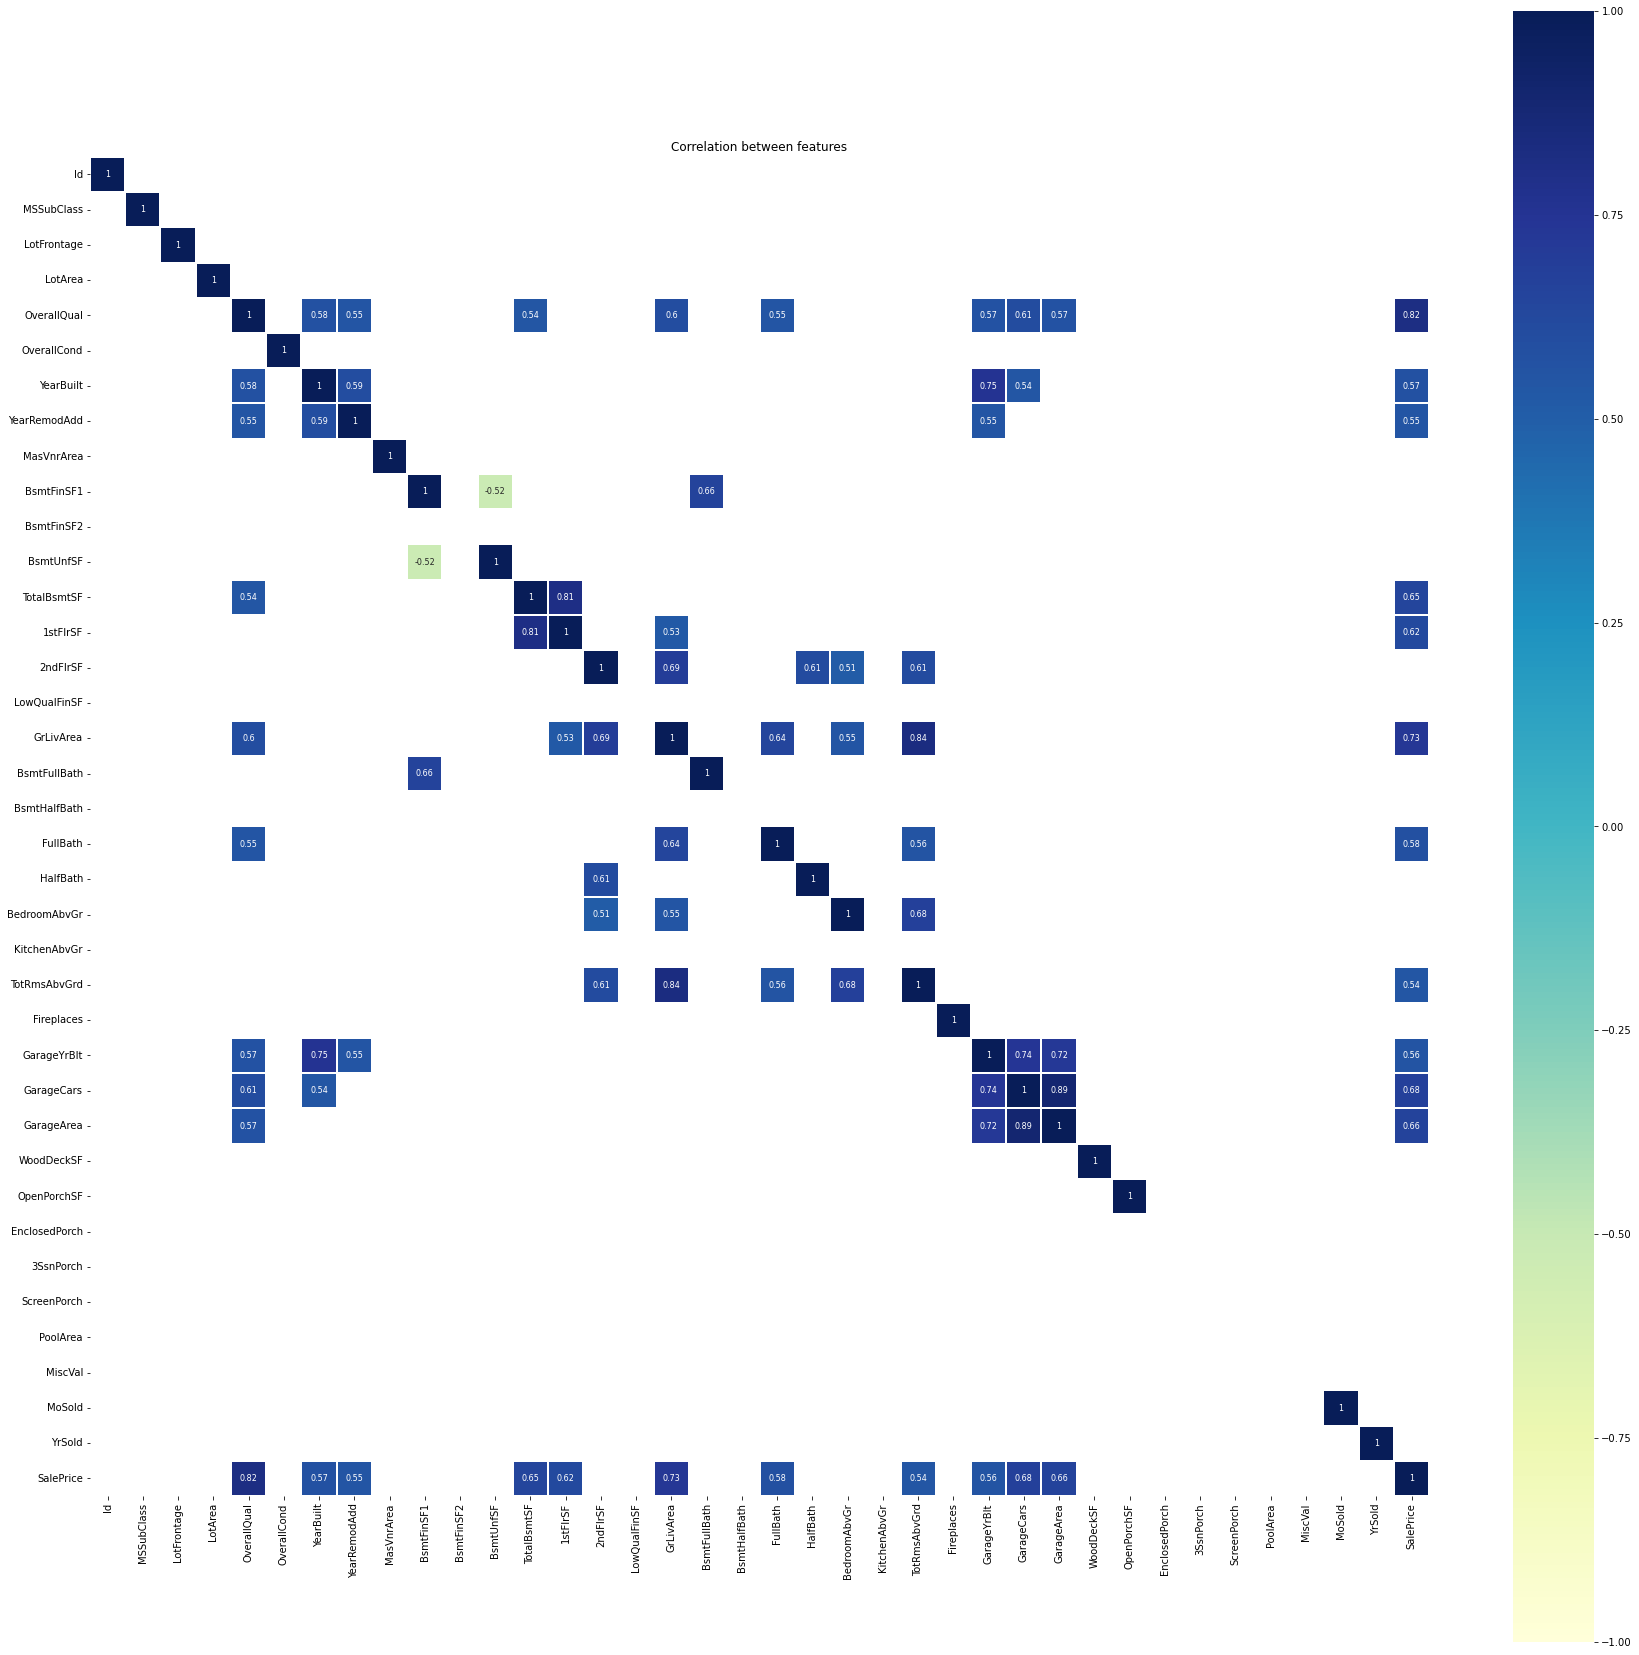

In [170]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=df_train_scaled.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')
print()
print('Findings:')
print()
print('few Plotted variables are showing moderate to high positive correlation. and will be eliminated during VIF check.')
print()


In [171]:
df_train_final=pd.concat([df_train_scaled,df_train_dummy],axis=1)

In [172]:
df_train_final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleConditio

In [174]:
#Separating target avriable and predictor variables
y_train=df_train_final.pop('SalePrice')
X_train=df_train_final

# Section5: Model Building


In [175]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, X_train).fit()
# Note the Swap of X and Y 
# model1.fit()

In [176]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              451.1
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                        0.00
Time:                        22:40:36   Log-Likelihood:                          2201.8
No. Observations:                1460   AIC:                                     -3910.
Df Residuals:                    1213   BIC:                                     -2604.
Df Model:                         247                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                       -0.0101      0.006     -1.729      0.084      -0.022       0.001
MSSubClass               -0.0187      0.028     -0.677      0.498      -0.073       0.035
LotFrontage              -0.0037      0.007     -0.503      0.615      -0.018       0.011
LotArea                   0.0763      0.013      5.735      0.000       0.050       0.102
OverallQual               0.1839      0.021      8.704      0.000       0.142       0.225
OverallCond               0.0690      0.010      6.813      0.000       0.049       0.089
YearBuilt                 0.0789      0.025      3.206      0.001       0.031       0.127
YearRemodAdd              0.0293      0.009      3.392      0.001       0.012       0.046
MasVnrArea                0.0045      0.010      0.443      0.658      -0.015       0.024
BsmtFinSF1               -0.0216      0.032     -0.682      0.495      -0.084       0.041
BsmtFinSF2            -2.192e-15   4.98e-16     -4.402      0.000   -3.17e-15   -1.22e-15
BsmtUnfSF                -0.0925      0.031     -2.984      0.003      -0.153      -0.032
TotalBsmtSF               0.2218      0.043      5.194      0.000       0.138       0.306
1stFlrSF                 -0.0771      0.049     -1.590      0.112      -0.172       0.018
2ndFlrSF                  0.0208      0.041      0.512      0.609      -0.059       0.101
LowQualFinSF           8.641e-16   3.63e-16      2.380      0.017    1.52e-16    1.58e-15
GrLivArea                 0.4368      0.059      7.454      0.000       0.322       0.552
BsmtFullBath              0.0235      0.012      1.924      0.055      -0.000       0.047
BsmtHalfBath           2.259e-15   5.24e-16      4.315      0.000    1.23e-15    3.29e-15
FullBath                 -0.0044      0.017     -0.263      0.793      -0.038       0.029
HalfBath                 -0.0057      0.011     -0.523      0.601      -0.027       0.016
BedroomAbvGr             -0.0009      0.015     -0.064      0.949      -0.030       0.028
KitchenAbvGr           2.103e-15   4.78e-16      4.403      0.000    1.17e-15    3.04e-15
TotRmsAbvGrd             -0.0190      0.020     -0.954      0.340      -0.058       0.020
Fireplaces                0.0218      0.017      1.276      0.202      -0.012       0.055
GarageYrBlt              -0.0230      0.019     -1.232      0.218      -0.060       0.014
GarageCars                0.0473      0.021      2.204      0.028       0.005       0.089
GarageArea                0.0695      0.021      3.347      0.001       0.029       0.110
WoodDeckSF                0.0234      0.007      3.455      0.001       0.010       0.037
OpenPorchSF               0.0167      0.006      2.589      0.010       0.004       0.029
EnclosedPorch 

# test with target dataset

In [ ]:
df_Test_House = train[train['Id'] >= 1461]

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, RandomForest_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))
r2 = r2_score(y_test, RandomForest_predictions)
r2_rounded = r2_score(y_test, RandomForest_predictions).round(2)

# Test

In [ ]:
df_test=pd.read_csv('test.csv')
test=df_test.copy()

In [ ]:
 # Adding total sqfootage feature 
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
test=test.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"], axis=1)

#importing the current year
import datetime

currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
current_year = date.strftime("%Y")
current_year=pd.to_numeric(current_year)


#Building new meaningful variables.
test['house_age'] = current_year - test['YearBuilt']
test['house_age_RemodAdd'] = current_year - test['YearRemodAdd']
test['house_age_garageYrBlt'] = current_year - test['GarageYrBlt']
test['house_age_YrSold'] = current_year - test['YrSold']

#Dropping the unwanted variables.
test=test.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [ ]:
house=df_house_price
house=house.drop(['SalePrice'],axis=1)
test=test[house.columns]

In [ ]:
df=test
missing_value()

In [ ]:
missing_value_imputation()

In [ ]:
Outlier_Treatment()

In [ ]:
# save all categorical columns in list
categorical_columns_test = [col for col in test.columns.values if test[col].dtype == 'object']

# dataframe with categorical features
df_test_cat = test[categorical_columns]
# dataframe with numerical features
df_test_num = test.drop(categorical_columns, axis=1)

In [ ]:
df_train_dummy.shape

In [ ]:
df_train_dummy.head(5)

In [ ]:
df_test_dummy=pd.get_dummies(df_test_cat,drop_first=True)


In [ ]:
df_test_dummy.shape

In [ ]:
set(df_test_dummy).symmetric_difference(set(df_train_dummy))

In [ ]:
df_test_num_scaled=pd.DataFrame(scaler.transform(df_test_num),columns=df_test_num.columns)

In [ ]:
df_house_price['Exterior2nd'].value_counts()

In [ ]:
test['Exterior2nd'].value_counts()

In [ ]:
_AsbShng'

In [ ]:
set(df_train_dummy).symmetric_difference(set(df_test_dummy))

In [ ]:
df_train_dummy['TotRmsAbvGrd_2']

In [ ]:
col=['BedroomAbvGr_8',
 'Condition1_Others',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_Others',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Others',
 'Exterior2nd_Stone',
 'Fireplaces_4',
 'Foundation_Others',
 'Foundation_Stone',
 'Foundation_Wood',
 'FullBath_4',
 'GarageCars_1',
 'GarageCars_1.0',
 'GarageCars_2',
 'GarageCars_2.0',
 'GarageCars_3',
 'GarageCars_3.0',
 'GarageCars_4',
 'GarageCars_4.0',
 'GarageCars_5.0',
 'GarageCars_nan',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Unf',
 'HouseStyle_Others',
 'KitchenQual_Ex',
 'LotConfig_FR',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_75',
 'MSSubClass_85',
 'MSZoning_C (all)',
 'MasVnrType_BrkCmn',
 'MasVnrType_No_type',
 'MasVnrType_None',
 'MasVnrType_nan',
 'MoSold',
 'MoSold_Aug',
 'MoSold_Dec',
 'MoSold_Feb',
 'MoSold_Jan',
 'MoSold_July',
 'MoSold_June',
 'MoSold_Mar',
 'MoSold_May',
 'MoSold_Nov',
 'MoSold_Oct',
 'MoSold_Sept',
 'OverallCond_2',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_5',
 'OverallCond_6',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'OverallCond_exce_veryexce',
 'OverallCond_fair_belowAvg',
 'OverallCond_good_verygood',
 'OverallCond_verypoor_poor',
 'OverallQual_10',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_exce_veryexce',
 'OverallQual_fair_belowAvg',
 'OverallQual_good_verygood',
 'OverallQual_verypoor_poor',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Others',
 'RoofStyle_Shed',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Others',
 'TotRmsAbvGrd_13',
 'TotRmsAbvGrd_14',
 'TotRmsAbvGrd_15','TotRmsAbvGrd_2']

In [ ]:
df_test_dummy=df_test_dummy.drop(col,axis=1)

# MAIN TEST SET

In [ ]:
#make the prediction
y_pred = model1.predict(df_test_num_scaled)
y_pred[:5]

In [ ]:
df = pd.DataFrame(y_pred,columns=['SalePrice'])
df.head()

In [ ]:
sol=pd.read_csv('sample_submission.csv')
sol.head()

In [ ]:
sol['SalePrice']=df['SalePrice']
sol.head()

In [ ]:
sol.to_csv('submissionHS.csv',index=False)